# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)

## imports for Python, Pandas

In [122]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [123]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [124]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [125]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [126]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Top 10 Countries with Most Projects

The top ten countries with the most projects are provided below.  CN and ID tie for first with 19 projects.  The remaining countries are listed in descending order.  A graph is provided for visualization of the variability.

Rank Country Number
1 CN 19
2 ID 19
3 VN 17
4 IN 16
5 RY 13
6 BD 12
7 MA 12
8 NP 12
9 3A 11
10 MZ 11


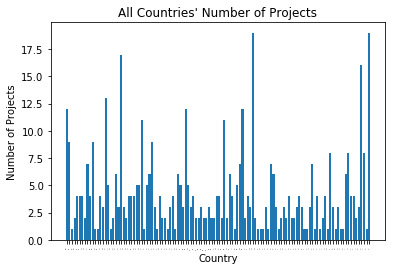

In [146]:
#Load data
full_json_df = pd.read_json('data/world_bank_projects.json')

#Define dictionary for counting projects
project_number = dict()

#Use loop to count instances of projects by country
for row in full_json_df['countrycode']:
    if row in project_number:
        project_number[row] += 1
    else:
        project_number[row] = 1

#Display results
print "Rank", "Country", "Number"       
i = 1
for country in sorted(project_number, key=project_number.get, reverse=True):
    if i <=10:
        print i, country, project_number[country]
        i += 1
    else:
        break

plt.bar(range(len(project_number)), list(project_number.values()), align='center')
plt.ylabel('Number of Projects')
plt.xlabel('Country')
plt.xticks(range(len(project_number)), list(project_number.keys()), rotation='vertical', fontsize = 1)
plt.title('All Countries\' Number of Projects')
plt.show()

### Top 10 major project themes

The top ten major project themes are listed below in descending order.

Rank Code Number
1 11 250
2 10 216
3 8 210
4 2 199
5 6 168
6 4 146
7 7 130
8 5 77
9 9 50
10 1 38


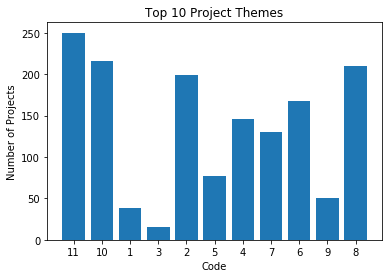

In [147]:
#Make dictionary to count instances of project themes
project_code = dict()

#Use loop to count instances of projects
for row in full_json_df['mjtheme_namecode']:
    for instance in row:
        if instance['code'] in project_code:
            project_code[instance['code']] += 1
        else:
            project_code[instance['code']] = 1

#Display results
i = 1
print "Rank", "Code", "Number"
for code in sorted(project_code, key=project_code.get, reverse=True):
    if i <= 10:
        print i, code, project_code[code]
        i += 1
    else:
        break
 

plt.bar(range(len(project_code)), list(project_code.values()), align='center')
plt.xticks(range(len(project_code)), list(project_code.keys()))
plt.ylabel('Number of Projects')
plt.xlabel('Code')
plt.title('Top 10 Project Themes')
plt.show()

### Dataframe with missing values

In [148]:
#Load the file
full_json_df = pd.read_json('data/world_bank_projects.json')

#Make dictionary for all code values, which will be used to populate empty fields
code_values = dict()

#Define the dictionary values by iterating through with known values
for row in full_json_df['mjtheme_namecode']:
    for instance in row:
        if instance['name'] == '':
            continue
        else:
            code_values[instance['code']] = instance['name']

            
#Find empty fields and insert values
for row in full_json_df['mjtheme_namecode']:
    for instance in row:
        if instance['name'] == '':
            instance['name'] = code_values[instance['code']]
        else:
            continue

#Examine the changes
print full_json_df['mjtheme_namecode']

0      [{u'code': u'8', u'name': u'Human development'...
1      [{u'code': u'1', u'name': u'Economic managemen...
2      [{u'code': u'5', u'name': u'Trade and integrat...
3      [{u'code': u'7', u'name': u'Social dev/gender/...
4      [{u'code': u'5', u'name': u'Trade and integrat...
5      [{u'code': u'6', u'name': u'Social protection ...
6      [{u'code': u'2', u'name': u'Public sector gove...
7      [{u'code': u'11', u'name': u'Environment and n...
8      [{u'code': u'10', u'name': u'Rural development...
9      [{u'code': u'2', u'name': u'Public sector gove...
10     [{u'code': u'10', u'name': u'Rural development...
11     [{u'code': u'10', u'name': u'Rural development...
12     [{u'code': u'4', u'name': u'Financial and priv...
13     [{u'code': u'5', u'name': u'Trade and integrat...
14     [{u'code': u'6', u'name': u'Social protection ...
15     [{u'code': u'10', u'name': u'Rural development...
16     [{u'code': u'10', u'name': u'Rural development...
17     [{u'code': u'8', u'name'